# Data Wrangling
* Often the first step of a Data Science project. 
* Datasets you want to work with may be generated from different softwares, devices, or even by hand.
* Before your *data science tool* can make sense out of them, often some "wrangling" is necessary.

## CSV i.e. "comma-seperated-value" format

In [1]:
import pandas as pd

In [2]:
from urllib import request

### Using `pd.read_csv`

In [3]:
url = "http://download-data.deutschebahn.com/static/datasets/stationsdaten/DBSuS-Uebersicht_Bahnhoefe-Stand2016-07.csv"

In [4]:
response = request.urlopen(url)
data = response.read()
bf_st = data.decode('utf-8')

In [5]:
import io
buf = io.StringIO(bf_st)

In [6]:
df = pd.read_csv(buf)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 201, saw 2


### Oops, let's try again, Ignoring badly formed lines

In [7]:
import io
buf = io.StringIO(bf_st)
df = pd.read_csv(buf, error_bad_lines=False)

b'Skipping line 201: expected 1 fields, saw 2\nSkipping line 205: expected 1 fields, saw 2\nSkipping line 669: expected 1 fields, saw 4\nSkipping line 670: expected 1 fields, saw 4\nSkipping line 671: expected 1 fields, saw 4\nSkipping line 672: expected 1 fields, saw 4\nSkipping line 673: expected 1 fields, saw 4\nSkipping line 674: expected 1 fields, saw 4\nSkipping line 675: expected 1 fields, saw 4\nSkipping line 676: expected 1 fields, saw 4\nSkipping line 677: expected 1 fields, saw 4\nSkipping line 678: expected 1 fields, saw 4\nSkipping line 679: expected 1 fields, saw 4\nSkipping line 680: expected 1 fields, saw 4\nSkipping line 681: expected 1 fields, saw 4\nSkipping line 682: expected 1 fields, saw 4\nSkipping line 683: expected 1 fields, saw 4\nSkipping line 684: expected 1 fields, saw 4\nSkipping line 1161: expected 1 fields, saw 2\nSkipping line 1228: expected 1 fields, saw 2\nSkipping line 3443: expected 1 fields, saw 2\nSkipping line 3854: expected 1 fields, saw 2\nSkip

In [8]:
df.head()

,Bundesland;BM;Bf. Nr.;Station;Bf DS 100 Abk.;Kat. Vst;Straße;PLZ;Ort;Aufgabenträger
0,Nordrhein-Westfalen;Aachen;1;Aachen Hbf;KA;2;B...
1,Nordrhein-Westfalen;Aachen;2;Aachen-Rothe Erde...
2,Nordrhein-Westfalen;Aachen;3;Aachen West;KAW;5...
3,Nordrhein-Westfalen;Aachen;184;Arsbeck;KARS;7;...
4,Nordrhein-Westfalen;Aachen;235;Hückelhoven-Baa...


In [9]:
df.shape, df.columns

((5347, 1),
 Index(['Bundesland;BM;Bf. Nr.;Station;Bf DS 100 Abk.;Kat. Vst;Straße;PLZ;Ort;Aufgabenträger'], dtype='object'))

Pandas did not recognize the columns, because we need to...

### Specify the  Delimiter

In [10]:
buf = io.StringIO(bf_st)
df = pd.read_csv(buf, delimiter = ';', error_bad_lines=False)

In [11]:
df.head()

,Bundesland,BM,Bf. Nr.,Station,Bf DS 100 Abk.,Kat. Vst,Straße,PLZ,Ort,Aufgabenträger
0,Nordrhein-Westfalen,Aachen,1,Aachen Hbf,KA,2,Bahnhofplatz 2a,52064,Aachen,Zweckverband Nahverkehr Rheinland GmbH
1,Nordrhein-Westfalen,Aachen,2,Aachen-Rothe Erde,KARE,4,Beverstr. 48,52066,Aachen,Zweckverband Nahverkehr Rheinland GmbH
2,Nordrhein-Westfalen,Aachen,3,Aachen West,KAW,5,Republikplatz 1,52072,Aachen,Zweckverband Nahverkehr Rheinland GmbH
3,Nordrhein-Westfalen,Aachen,184,Arsbeck,KARS,7,Heidestr.1,41844,Wegberg,Zweckverband Nahverkehr Rheinland GmbH
4,Nordrhein-Westfalen,Aachen,235,Hückelhoven-Baal,KBA,4,Bahnstr.11,41836,Hückelhoven-Baal,Zweckverband Nahverkehr Rheinland GmbH


In [12]:
df.columns

Index(['Bundesland', 'BM', 'Bf. Nr.', 'Station', 'Bf DS 100 Abk.', 'Kat. Vst',
       'Straße', 'PLZ', 'Ort', 'Aufgabenträger'],
      dtype='object')

### Reading only certain columns

In [13]:
buf = io.StringIO(bf_st)
df = pd.read_csv(buf, delimiter=';', error_bad_lines=False, usecols=['Bundesland', 'Station', 'PLZ'])
df.head()

,Bundesland,Station,PLZ
0,Nordrhein-Westfalen,Aachen Hbf,52064
1,Nordrhein-Westfalen,Aachen-Rothe Erde,52066
2,Nordrhein-Westfalen,Aachen West,52072
3,Nordrhein-Westfalen,Arsbeck,41844
4,Nordrhein-Westfalen,Hückelhoven-Baal,41836


### Supplying your own column information

In [14]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
response = request.urlopen(url)
data = response.read()
census_st = data.decode('utf-8')

In [15]:
import io
buf = io.StringIO(census_st)

In [16]:
df = pd.read_csv(buf)

In [17]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [18]:
buf = io.StringIO(census_st)
df = pd.read_csv(buf, usecols=[0, 1,3], names = ['age', 'job', 'education'])
df.head()

,age,job,education
0,39,State-gov,Bachelors
1,50,Self-emp-not-inc,Bachelors
2,38,Private,HS-grad
3,53,Private,11th
4,28,Private,Bachelors


#### Converting columns to desired datatype

In [19]:
buf = io.StringIO(census_st)
df = pd.read_csv(buf, usecols=[0, 1,3], names = ['age', 'job', 'education'], dtype={'age':float, 'job':str, 'education':np.str})
df.head()

,age,job,education
0,39.0,State-gov,Bachelors
1,50.0,Self-emp-not-inc,Bachelors
2,38.0,Private,HS-grad
3,53.0,Private,11th
4,28.0,Private,Bachelors


#### Changing datatype is also possible afterwards:

In [20]:
df.astype({'age':int, 'job':str, 'education':np.str}).head()

,age,job,education
0,39,State-gov,Bachelors
1,50,Self-emp-not-inc,Bachelors
2,38,Private,HS-grad
3,53,Private,11th
4,28,Private,Bachelors


### Handling datetimes

In [21]:
df = pd.read_csv('/home/dmanik/amazonianBirds_climate.csv')
df.head()

,recordist,date,time,location,longitude,latitude,elevation,climate
0,Daniel Lane,2011-02-24,05:55,"10 km S Pocone on Transpantaneira, Mato Grosso",-56.6480,-16.3620,115,tropical
1,Daniel Lane,2011-02-24,06:05,"10 km S Pocone on Transpantaneira, Mato Grosso",-56.6480,-16.3620,115,tropical
2,Eric DeFonso,2011-09-03,18:00,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical
3,Eric DeFonso,2011-09-04,06:00,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical
4,Eric DeFonso,2011-09-04,06:05,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical


#### Merge `date` and `time` columns

In [22]:
df = pd.read_csv('/home/dmanik/amazonianBirds_climate.csv', parse_dates={'datetime':[1,2]}, error_bad_lines=False)
df.head()

,datetime,recordist,location,longitude,latitude,elevation,climate
0,2011-02-24 05:55,Daniel Lane,"10 km S Pocone on Transpantaneira, Mato Grosso",-56.6480,-16.3620,115,tropical
1,2011-02-24 06:05,Daniel Lane,"10 km S Pocone on Transpantaneira, Mato Grosso",-56.6480,-16.3620,115,tropical
2,2011-09-03 18:00,Eric DeFonso,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical
3,2011-09-04 06:00,Eric DeFonso,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical
4,2011-09-04 06:05,Eric DeFonso,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical


#### Still not available as `datetime` objects

In [31]:
import datetime

In [24]:
df.dtypes

datetime      object
recordist     object
location      object
longitude    float64
latitude     float64
elevation     object
climate       object
dtype: object

In [28]:
z = pd.to_datetime(df['datetime'], errors = 'coerce')
z.head()

0   2011-02-24 05:55:00
1   2011-02-24 06:05:00
2   2011-09-03 18:00:00
3   2011-09-04 06:00:00
4   2011-09-04 06:05:00
Name: datetime, dtype: datetime64[ns]

In [29]:
z[1:4] - z[0:3]

0      NaT
1   0 days
2   0 days
3      NaT
Name: datetime, dtype: timedelta64[ns]

Alternate: filter the DataFrame

In [32]:
df = df[df.apply((lambda x: '?' not in x['datetime']), axis =1)]
df['datetime'].astype(datetime.datetime, raise_on_error = False).head()

/home/dmanik/projects/mpi/pyd3t/.devenv34/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: the raise_on_error=False keyword is deprecated, use errors='ignore' instead
  


0    2011-02-24 05:55
1    2011-02-24 06:05
2    2011-09-03 18:00
3    2011-09-04 06:00
4    2011-09-04 06:05
Name: datetime, dtype: object

In [33]:
df.head()

,datetime,recordist,location,longitude,latitude,elevation,climate
0,2011-02-24 05:55,Daniel Lane,"10 km S Pocone on Transpantaneira, Mato Grosso",-56.6480,-16.3620,115,tropical
1,2011-02-24 06:05,Daniel Lane,"10 km S Pocone on Transpantaneira, Mato Grosso",-56.6480,-16.3620,115,tropical
2,2011-09-03 18:00,Eric DeFonso,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical
3,2011-09-04 06:00,Eric DeFonso,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical
4,2011-09-04 06:05,Eric DeFonso,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical


In [34]:
df['datetime2'] = pd.to_datetime(df['datetime'], errors='coerce')
df.dtypes

datetime             object
recordist            object
location             object
longitude           float64
latitude            float64
elevation            object
climate              object
datetime2    datetime64[ns]
dtype: object

In [35]:
df.head()

,datetime,recordist,location,longitude,latitude,elevation,climate,datetime2
0,2011-02-24 05:55,Daniel Lane,"10 km S Pocone on Transpantaneira, Mato Grosso",-56.6480,-16.3620,115,tropical,2011-02-24 05:55:00
1,2011-02-24 06:05,Daniel Lane,"10 km S Pocone on Transpantaneira, Mato Grosso",-56.6480,-16.3620,115,tropical,2011-02-24 06:05:00
2,2011-09-03 18:00,Eric DeFonso,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical,2011-09-03 18:00:00
3,2011-09-04 06:00,Eric DeFonso,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical,2011-09-04 06:00:00
4,2011-09-04 06:05,Eric DeFonso,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical,2011-09-04 06:05:00


In [36]:
x = df[(df['datetime2']>'2013-07-03') & (df['datetime2']<'2013-07-15')]

In [37]:
x.head()

,datetime,recordist,location,longitude,latitude,elevation,climate,datetime2
24,2013-07-13 07:15,Josh Engel,Reserva Biologica do Gurupi,-46.8045,-3.8141,190,tropical,2013-07-13 07:15:00
533,2013-07-13 10:00,Thiago Bicudo,"Silves, Amazonas",-58.3480,-2.9578,30,tropical,2013-07-13 10:00:00
663,2013-07-09 07:15,Josh Engel,Reserva Biologica do Gurupi,-46.8045,-3.8141,190,tropical,2013-07-09 07:15:00
782,2013-07-12 17:30,João Vitor Andriola,"Itagiba, São Francisco de Paula, Rio Grande so...",-50.5892,-29.5112,440,subtropical,2013-07-12 17:30:00
908,2013-07-13 12:30,Rodrigo Dela Rosa,"Senador Guiomard, Acre",-67.7537,-10.1453,180,tropical,2013-07-13 12:30:00


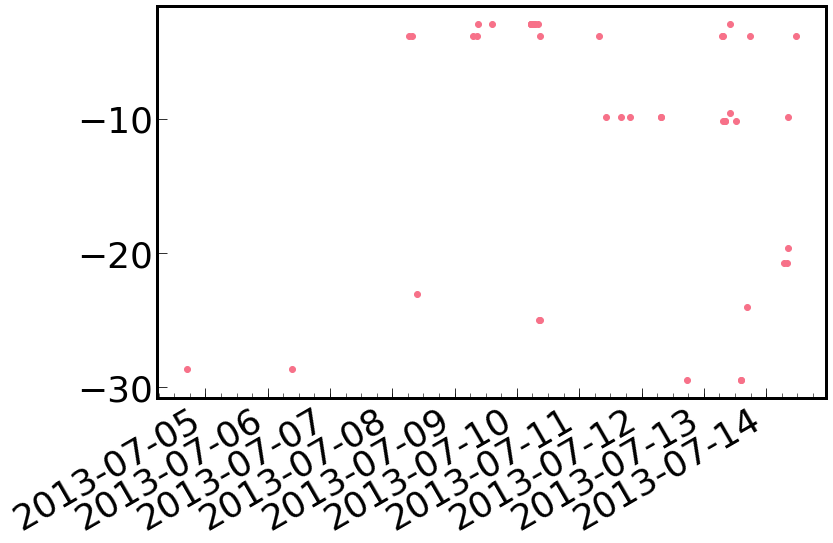

In [38]:
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange

fig, ax = plt.subplots()

ax.plot_date(x['datetime2'], x['latitude'], 'o')
# The hour locator takes the hour or sequence of hours you want to
# tick, not the base multiple

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_minor_locator(HourLocator(np.arange(0, 25, 6)))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')
fig.autofmt_xdate()


## JSON

In [39]:
url = 'http://api.open-notify.org/astros.json?callback=?'

In [40]:
response = request.urlopen(url)
data = response.read()
sp_st = data.decode('utf-8')

In [41]:
sp_st

'?({"number": 6, "people": [{"craft": "ISS", "name": "Alexander Misurkin"}, {"craft": "ISS", "name": "Mark Vande Hei"}, {"craft": "ISS", "name": "Joe Acaba"}, {"craft": "ISS", "name": "Anton Shkaplerov"}, {"craft": "ISS", "name": "Scott Tingle"}, {"craft": "ISS", "name": "Norishige Kanai"}], "message": "success"})'

In [42]:
import json

In [43]:
dat = json.loads(sp_st[2:-1])
dat

{'message': 'success',
 'number': 6,
 'people': [{'craft': 'ISS', 'name': 'Alexander Misurkin'},
  {'craft': 'ISS', 'name': 'Mark Vande Hei'},
  {'craft': 'ISS', 'name': 'Joe Acaba'},
  {'craft': 'ISS', 'name': 'Anton Shkaplerov'},
  {'craft': 'ISS', 'name': 'Scott Tingle'},
  {'craft': 'ISS', 'name': 'Norishige Kanai'}]}

In [44]:
pd.DataFrame(dat['people'])

,craft,name
0,ISS,Alexander Misurkin
1,ISS,Mark Vande Hei
2,ISS,Joe Acaba
3,ISS,Anton Shkaplerov
4,ISS,Scott Tingle
5,ISS,Norishige Kanai


## HTML

In [45]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_electricity_production_from_renewable_sources'

In [46]:
response = request.urlopen(url)
data = response.read()
wk_st = data.decode('utf-8')

In [47]:
wk_st

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of countries by electricity production from renewable sources - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_electricity_production_from_renewable_sources","wgTitle":"List of countries by electricity production from renewable sources","wgCurRevisionId":823718756,"wgRevisionId":823718756,"wgArticleId":17068413,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with citations lacking titles","Pages with citations having bare URLs","Pages with URL errors","Wikipedia articles in need of updating from January 2018

In [48]:
from importlib import reload

In [49]:
import bs4
reload(bs4)
reload(pd)

<module 'pandas' from '/home/dmanik/projects/mpi/pyd3t/.devenv34/lib/python3.5/site-packages/pandas/__init__.py'>

In [50]:
soup = bs4.BeautifulSoup(wk_st, "lxml")

In [51]:
print(str(soup))

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries by electricity production from renewable sources - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_electricity_production_from_renewable_sources","wgTitle":"List of countries by electricity production from renewable sources","wgCurRevisionId":823718756,"wgRevisionId":823718756,"wgArticleId":17068413,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with citations lacking titles","Pages with citations having bare URLs","Pages with URL errors","Wikipedia articles in need of updating from January 2018","All Wi

In [52]:
len(soup.find_all('table', class_='wikitable sortable'))

1

In [55]:
bigtable = soup.find_all('table', class_='wikitable sortable')[0]

In [56]:
df = pd.read_html(io.StringIO(str(bigtable)))[0]

In [57]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,Country,Year,Total renewable (GWh),Hydropower (GWh),Wind power (GWh),Biomass (GWh),Solar power (GWh),Geothermal (GWh),% of total generation,Ref and notes
1,Afghanistan,2012,710,710,-,-,-,-,80.32%,NaN
2,Albania,2012,4245,4245,-,-,-,-,99.98%,NaN
3,Algeria,2012,616,616,-,-,-,-,1.14%,NaN
4,Angola,2012,3940,3940,-,-,-,-,71.96%,NaN


What happened to the headers?

In [58]:
df = pd.read_html(io.StringIO(str(bigtable)), header=0)[0]
df.head()

,Country,Year,Total renewable (GWh),Hydropower (GWh),Wind power (GWh),Biomass (GWh),Solar power (GWh),Geothermal (GWh),% of total generation,Ref and notes
0,Afghanistan,2012,710,710,-,-,-,-,80.32%,NaN
1,Albania,2012,4245,4245,-,-,-,-,99.98%,NaN
2,Algeria,2012,616,616,-,-,-,-,1.14%,NaN
3,Angola,2012,3940,3940,-,-,-,-,71.96%,NaN
4,Argentina,2015,42072,41464,608,-,608,-,31.1%,608 GWh mentioned is the total amount from win...


## Excel 

```python
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
```

# Exercises

## CSV:
* Browse the datasets at [http://www.gapminder.org/data/](http://www.gapminder.org/data/).
Import into Pandas using `pd.read_csv` a few.


* [Energy use per person by Country](http://docs.google.com/spreadsheet/pub?key=0AkBd6lyS3EmpdHRmYjJWLVF0SjlQY1N5Vm9yU0xxaGc&output=xlsx).
    - Identify top 10 countries, and plot the variation with time. 
* [GPS data from Cargoship containers](http://data.deutschebahn.com/dataset/data-sensordaten-schenker-seefrachtcontainer).
    - Plot the trajectories of eachship by `plt.scatter.`
* [IMDB data](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset/downloads/movie_metadata.csv.zip).
    - Identify top 10 directors in terms of total likes. 

## HTML
Compile a list of all cities with > 100000 inhabitants and the countries they belong to by crawling the [links in this wikipedia page](https://en.wikipedia.org/wiki/List_of_towns_and_cities_with_100,000_or_more_inhabitants/cityname:_B). 